# <font face="courier"  ><center><font color=#34FFB6 >Data Cleaning  </font > </center></font>

In [1]:
# Importing pandas and numpy - data manipulation libraries
import pandas as pd 
import numpy as np

# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Airbnb NYC 2019.csv") # reading the CSV file

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# As the last_review should be a date-Time not int so changing datatype
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')
df['last_review'].dtype.type

numpy.datetime64

<AxesSubplot:>

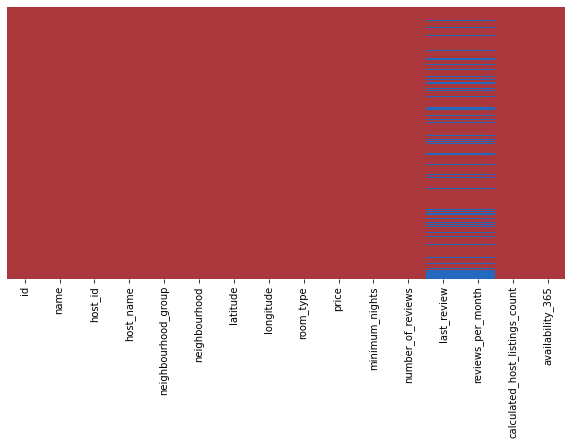

In [5]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), yticklabels=False, cmap='vlag_r', cbar=False)
# showing that the last_review and reviews_per _month have significant amounts of missing values
# blue color shows the missing values

### <font face="courier"  ><center>  <font color=#39ff14 > Dropping </font >Columns </center></font>

In [6]:
# id is unnecessary here as we already have host_id
df.drop("id", axis=1, inplace=True)

In [7]:
# here last_review serves no purpose as it will be recorded under number_of_reviews
df.drop("last_review", axis=1, inplace=True)

In [8]:
# Dropping the host_name due to privacy concern and as it is of no use as we have property name already
df.drop("host_name", axis=1, inplace=True)

In [9]:
df.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [10]:
df.isnull().mean()*100 # this gives us the % of missing values

name                               0.032723
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [11]:
df.shape

(48895, 13)

Imputing the values

In [12]:
df["price"].fillna(df["price"].mean(),inplace= True)  # as price has some missing values

In [13]:
df.fillna({'reviews_per_month':0}, inplace=True) # replace null values in reviews_per_month with 0 

In [14]:
df.isnull().sum() # this gives us the missing values

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [15]:
df.drop_duplicates()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [16]:
df.duplicated().sum()

0

### <font face="courier"  ><center>  <font color=#39ff14 > Neighbourhood </font >Distribution </center></font>

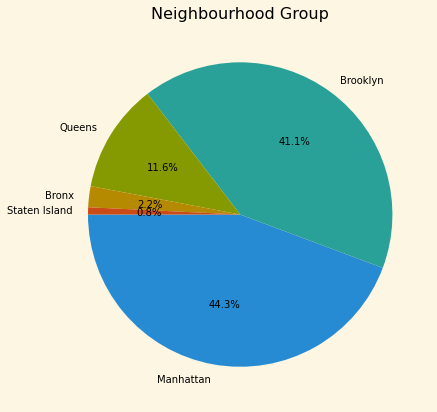

In [17]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

####  <font face="courier"> Here we can see that <font color=#34FFB6 >Manhattan</font> & <font color=#39ff14 >Brooklyn</font> have the majority and least being <font color=#34FFB6 >Staten Island</font>

In [18]:
# The Average Price of the room per night based on the locality
avg_price_per_night= df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
avg_price_per_night.rename(columns={'price': 'avg_neighborhood_price'}, inplace=True)
avg_price_per_night

,neighbourhood_group,room_type,avg_neighborhood_price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


array([<AxesSubplot:ylabel='Room Type wise booking'>], dtype=object)

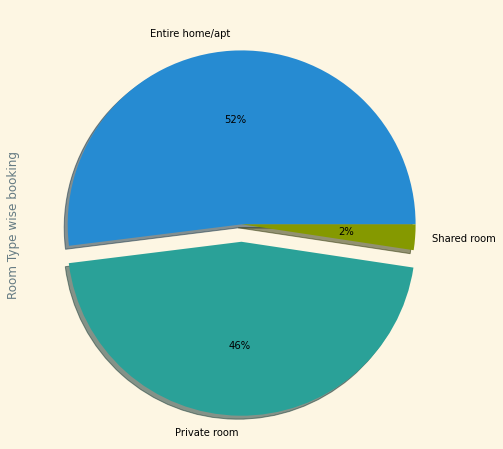

In [19]:
# Shares of room_types
explode = (0, 0.1, 0)
df['room_type'].value_counts().plot(kind='pie', subplots=True,explode=explode,shadow=True,
                                        figsize=(8, 8),label='Room Type wise booking',
                                        autopct='%.0f%%',)

#### <font face="courier"> It seems like people prefer  <font color=#34FFB6 >private rooms/home</font> when compared to <font color=#39ff14 >shared room</font>

<AxesSubplot:xlabel='room_type', ylabel='avg_neighborhood_price'>

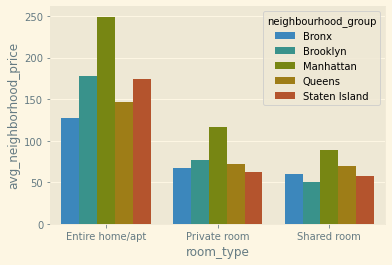

In [20]:
#plotting the group by data 
sns.barplot(data=avg_price_per_night , x='room_type', y='avg_neighborhood_price', hue='neighbourhood_group')

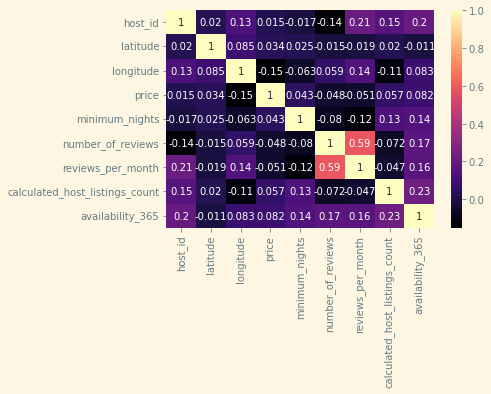

In [21]:
data_plot= sns.heatmap(df.corr(), cmap="magma", annot=True)
plt.show()

#### <font face="courier"> Here we can see that <font color=#34FFB6 >number_of _reviews</font> & <font color=#39ff14 >reviews_per_month</font> are related

<font face="courier"><b>As we can see in our observation</b>-:<br>
1.) Here we can see that Manhattan & Brooklyn have the majority and least being Staten Island<br>
2.) It seems like people prefer private rooms/home when compared to shared room<br>
3.) Here we can see that number_of _reviews & reviews_per_month are related<br>
4.) In Entire home/apt , Manhattan has the maximum average price, followed by staten Island and least is in Bronx<br>
5.) In Private Room again Manahattan leads the chart , followed by Queens and least is in bronx<br>
6.) In shared rooms , Manhattan leads , followed by Queens and staten Island has the least maximum price.<br>
We can say that Manhattan has the maximum average price in every type of room whereas bronx has the least maximum average price.<br>

### <font face="courier"> made by Brajeshwar Thakur